In [1]:
#Loading the data
import pandas as pd
df = pd.read_csv('Constraint_Train.csv')
#To check the columns present
df.columns
df.head(5)
df.info()
df.shape
#To get the count of missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)
df.drop_duplicates(inplace=True)
df.shape
#Dropping duplicate rows and checking if any rows are removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB
id       0
tweet    0
label    0
dtype: int64


(6420, 3)

Showing the count of fake and real news
real    3360
fake    3060
Name: label, dtype: int64


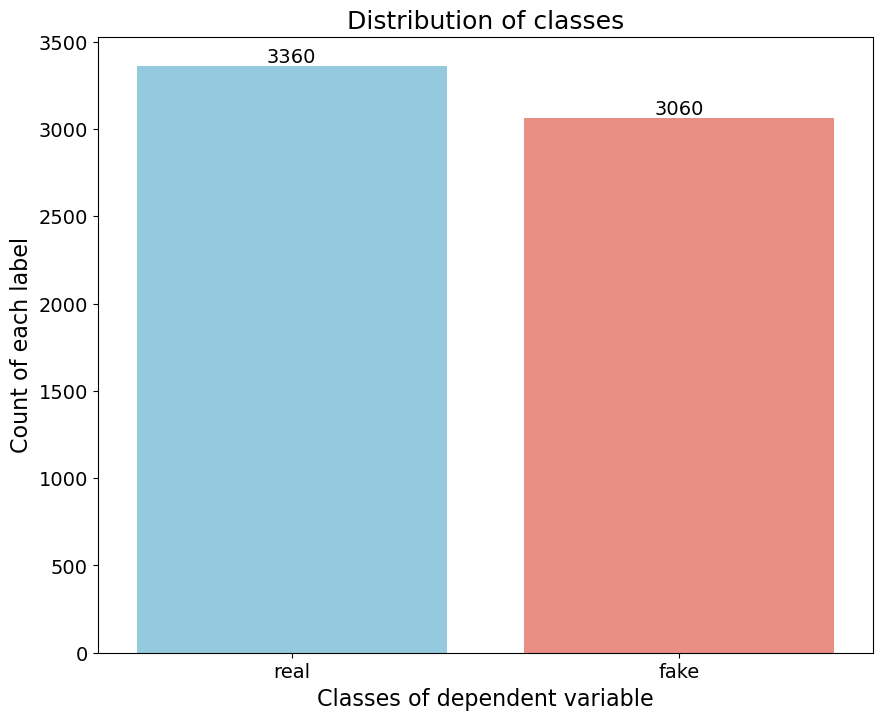

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_class_distribution(data_frame, label_column, colors=None, figsize=(8, 6), fontsize=12):
    count = data_frame[label_column].value_counts()
    print("Showing the count of fake and real news")
    #Printing the number of real and fake news
    print(count)

    if colors is None:
        colors = ['skyblue', 'salmon']

    plt.figure(figsize=figsize)
    ax = sns.barplot(x=count.index, y=count, palette=colors)

    for index, value in enumerate(count):
        ax.text(index, value, str(value), ha='center', va='bottom', fontsize=fontsize)

    plt.xlabel("Classes of dependent variable", fontsize=fontsize+2)
    plt.ylabel("Count of each label", fontsize=fontsize+2)
    plt.title("Distribution of classes", fontsize=fontsize+4)
    plt.tick_params(axis='x', labelsize=fontsize)
    plt.tick_params(axis='y', labelsize=fontsize)
#Calling the function to draw the barplot
plot_class_distribution(df, 'label', figsize=(10, 8), fontsize=14)


In [3]:
#Calculating the length of words in each sentence and showing some statistics regarding text length
text_lengths = df['tweet'].apply(lambda x: len(str(x)))

# Calculation of average text length in dataframe
average_length = text_lengths.mean()

# calculating the maximum and minimum lenth across the data frame 
max_length = text_lengths.max()
min_length = text_lengths.min()

#Printing the text lengths
print("Average Text Length:", average_length)
print("Maximum Text Length:", max_length)
print("Minimum Text Length:", min_length)

Average Text Length: 181.6140186915888
Maximum Text Length: 8846
Minimum Text Length: 18


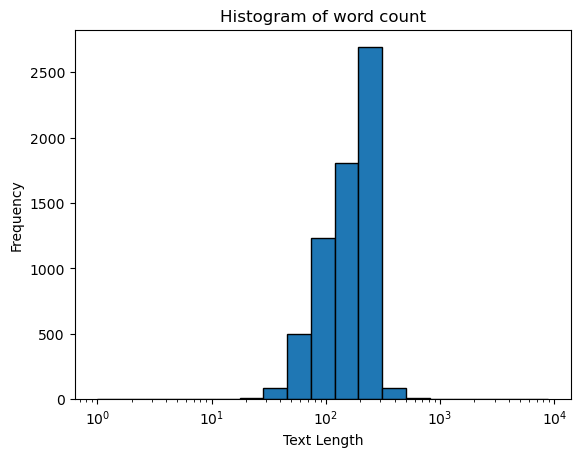

In [4]:
import numpy as np
df['text_length'] = df['tweet'].apply(lambda x: len(str(x)))
plt.hist(df['text_length'], bins=np.logspace(0, np.log10(max_length), 20), edgecolor='black')
plt.xscale('log')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of word count')
plt.show()

In [5]:
#Checking the column names
df.columns

Index(['id', 'tweet', 'label', 'text_length'], dtype='object')

In [6]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
def preprocess_text(tweet):
    # Removing punctuations if any in the text
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Converting all characters in the string to lowercase
    tweet = tweet.lower()
    
    #splitting inmto words
    words = tweet.split()
    
    #removing stopwords if any in the data
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    processed_tweet = ' '.join(words)
    
    return processed_tweet

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/narendranathreddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df['processed_tweet'] = df['tweet'].apply(preprocess_text)
df.head(5)
#we can see new column processed tweet added after performing preprocessing

,id,tweet,label,text_length,processed_tweet
0,1,The CDC currently reports 99031 deaths. In gen...,real,190,cdc currently reports 99031 deaths general dis...
1,2,States reported 1121 deaths a small rise from ...,real,129,states reported 1121 deaths small rise last tu...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,131,politically correct woman almost uses pandemic...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,204,indiafightscorona 1524 covid testing laborator...
4,5,Populous states can generate large case counts...,real,231,populous states generate large case counts loo...


In [8]:
#Performing lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    # Splitting the text into individual words
    words = nltk.word_tokenize(text)
    # Performing lemmatization
    lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in words])

    return lemmatized_text
df['lemmatized_tweet'] = df['processed_tweet'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/narendranathreddy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/narendranathreddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
df.head(5)
#we can observe that n ew column lemmatized_tweet is added and this is th columns we will be working now as we applied all our preprocessing steps

,id,tweet,label,text_length,processed_tweet,lemmatized_tweet
0,1,The CDC currently reports 99031 deaths. In gen...,real,190,cdc currently reports 99031 deaths general dis...,cdc currently report 99031 death general discr...
1,2,States reported 1121 deaths a small rise from ...,real,129,states reported 1121 deaths small rise last tu...,state reported 1121 death small rise last tues...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,131,politically correct woman almost uses pandemic...,politically correct woman almost us pandemic e...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,204,indiafightscorona 1524 covid testing laborator...,indiafightscorona 1524 covid testing laborator...
4,5,Populous states can generate large case counts...,real,231,populous states generate large case counts loo...,populous state generate large case count look ...


In [10]:
text_lengths_after_preprocessing= df['lemmatized_tweet'].apply(lambda x: len(str(x)))
print("Average Text Length:",  text_lengths_after_preprocessing.mean())
print("Maximum Text Length:", text_lengths_after_preprocessing.max())
print("Minimum Text Length:", text_lengths_after_preprocessing.min())
#Printing lenth statistcis after preprocessing the data 
#We can observe that legnth has decreased after preprocessing as we have removed many characters

Average Text Length: 134.3752336448598
Maximum Text Length: 6413
Minimum Text Length: 8


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X=df['lemmatized_tweet'] #Selecting the independet variable
y=df['label'] #Selecting the target variable/dependent variable
from sklearn.model_selection import train_test_split
#Splitting data into training and test data sets using scikit learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
train_size = len(X_train)
test_size = len(X_test)
print(f"Count of observations in training data set is {train_size}")
print(f"Count of observations in training data set is {test_size}")

Count of observations in training data set is 5136
Count of observations in training data set is 1284


In [13]:
tfidf_vectors_train = vectorizer.fit_transform(X_train)
print(tfidf_vectors_train)
tfidf_vectors_test = vectorizer.transform(X_test)
print(tfidf_vectors_test)

  (0, 5938)	0.19911210074918345
  (0, 121)	0.1876337048931663
  (0, 16465)	0.14334626002198514
  (0, 13919)	0.16022138791536583
  (0, 12109)	0.167154224149125
  (0, 375)	0.24977469322989063
  (0, 15376)	0.11876133077716804
  (0, 13713)	0.23918307259431634
  (0, 4030)	0.2222163043492161
  (0, 451)	0.27861809475793187
  (0, 4645)	0.27861809475793187
  (0, 294)	0.25679890380526593
  (0, 10705)	0.1779288594780349
  (0, 423)	0.25679890380526593
  (0, 5366)	0.24403549530188204
  (0, 6721)	0.20613631132455876
  (0, 6382)	0.27861809475793187
  (0, 12840)	0.3142446970771127
  (0, 492)	0.26585468625454795
  (1, 13835)	0.1625871502535231
  (1, 4486)	0.14097032364003906
  (1, 2114)	0.2415515258439488
  (1, 2078)	0.18860735558739095
  (1, 12452)	0.16722940375817974
  (1, 336)	0.3154760728290795
  :	:
  (5134, 16223)	0.3052794315946455
  (5134, 3222)	0.2982648735599008
  (5134, 15554)	0.24492920431534523
  (5134, 5567)	0.274944675741024
  (5134, 5146)	0.24039767247869134
  (5134, 2805)	0.26566631462

In [23]:
#Importing the require libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [25]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machines': SVC(),
    'Random Forests': RandomForestClassifier(),
    'Boosting': GradientBoostingClassifier(),
    'Naive Bayes': MultinomialNB()
}
#For storing the tesing and train accuracies
train_accuracies = {}
test_accuracies = {}

In [26]:
def accuracy_calculation(model, train_data, train_labels, test_data, test_labels):
    model.fit(train_data, train_labels)
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    train_accuracy = accuracy_score(train_labels, train_pred)
    test_accuracy = accuracy_score(test_labels, test_pred)
    return train_accuracy, test_accuracy
for model_name, model in models.items():
    train_acc, test_acc = accuracy_calculation(model, tfidf_vectors_train, y_train, tfidf_vectors_test, y_test)
    train_accuracies[model_name] = train_acc
    test_accuracies[model_name] = test_acc
   

In [27]:
print(train_accuracies)
print(test_accuracies)

{'Logistic Regression': 0.9598909657320872, 'Support Vector Machines': 0.9990264797507789, 'Random Forests': 1.0, 'Boosting': 0.8899922118380063, 'Naive Bayes': 0.9604750778816199}
{'Logistic Regression': 0.9073208722741433, 'Support Vector Machines': 0.9213395638629284, 'Random Forests': 0.8948598130841121, 'Boosting': 0.8652647975077882, 'Naive Bayes': 0.8987538940809969}


In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],        # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel type: linear or RBF
    'gamma': ['scale', 'auto']      # Kernel coefficient for 'rbf' kernel
}

# Create GridSearchCV instance for SVM
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, cv=5)

# Fit the model using GridSearchCV to find the best hyperparameters
grid_search.fit(tfidf_vectors_train, y_train)

# Print the best parameters found by GridSearchCV
print(f'Best Parameters: {grid_search.best_params_}')


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.882 total time=   1.5s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.870 total time=   1.5s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.891 total time=   1.5s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.879 total time=   1.5s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.864 total time=   1.5s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.865 total time=   1.9s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.838 total time=   1.8s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.874 total time=   1.8s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.863 total time=   1.8s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.847 total time=   1.8s
[CV 1/5] END ..C=0.1, gamma=auto, kernel=linear;, score=0.882 total time=   1.5s
[CV 2/5] END ..C=0.1, gamma=auto, kernel=linear;

Accuracy: 0.93
Precision: 0.90
Recall: 0.95
F1 Score: 0.92


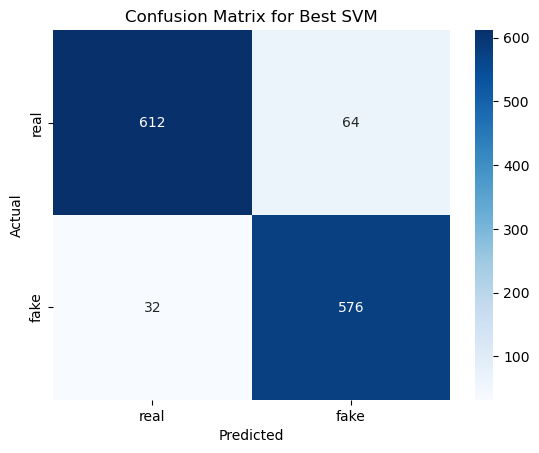

In [33]:
# Train the final model with the best parameters
best_svm = grid_search.best_estimator_

# Fit the model on the training data
best_svm.fit(tfidf_vectors_train, y_train)

# Make predictions on the test set
y_pred = best_svm.predict(tfidf_vectors_test)

# Calculate and print evaluation metrics for the tuned model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='fake')
recall = recall_score(y_test, y_pred, pos_label='fake')
f1 = f1_score(y_test, y_pred, pos_label='fake')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Generate the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['real', 'fake'])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for Best SVM')
plt.show()


Model: LogisticRegression
Test Accuracy: 0.91
Precision: 0.88
Recall: 0.93
F1 Score: 0.90




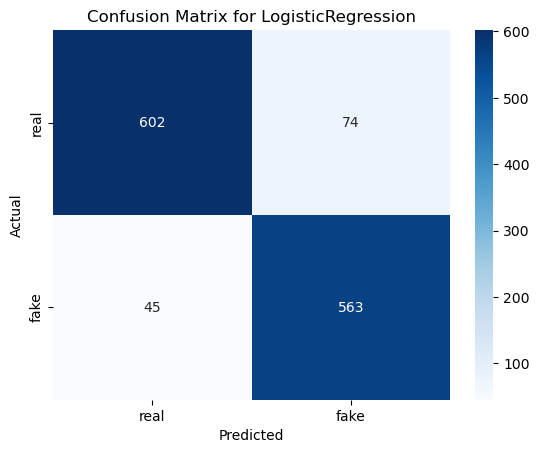

Model: SVC
Test Accuracy: 0.92
Precision: 0.89
Recall: 0.95
F1 Score: 0.92




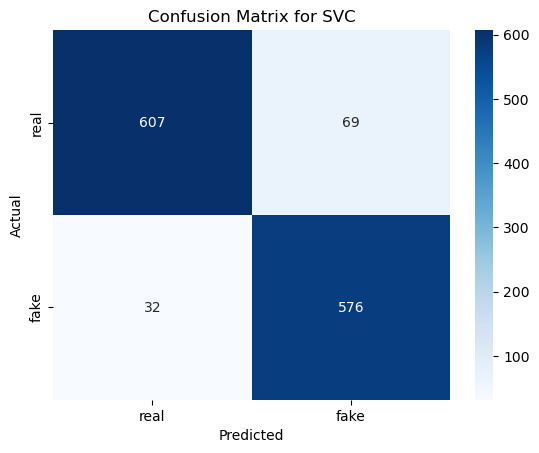

Model: RandomForestClassifier
Test Accuracy: 0.90
Precision: 0.86
Recall: 0.94
F1 Score: 0.90




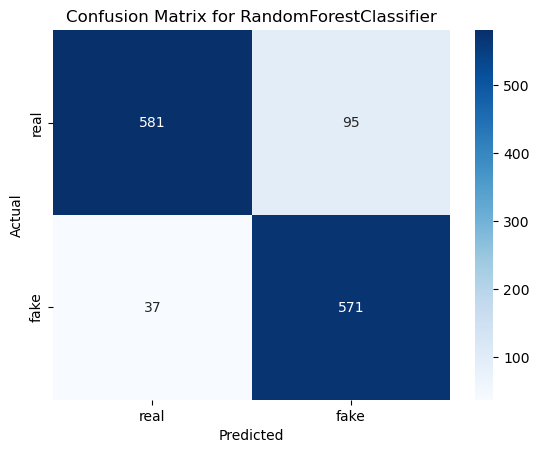

Model: GradientBoostingClassifier
Test Accuracy: 0.87
Precision: 0.82
Recall: 0.92
F1 Score: 0.87




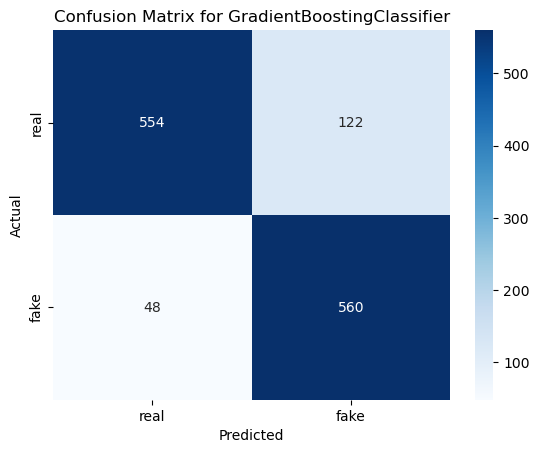

Model: GaussianNB
Test Accuracy: 0.84
Precision: 0.80
Recall: 0.89
F1 Score: 0.84




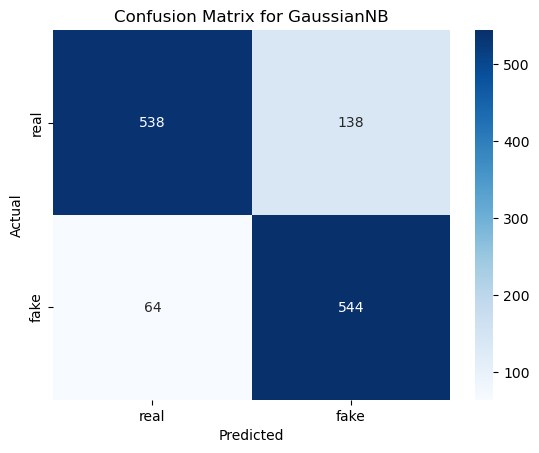

In [30]:
from sklearn.naive_bayes import GaussianNB

# Dictionary of models (assuming you have other models like SVM, Logistic Regression already)
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine (SVM)': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes (GaussianNB)': GaussianNB()  # Replacing MultinomialNB with GaussianNB
}

# Function for calculating metrics and plotting the confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def accuracy_and_metrics_calculation(model, train_data, train_labels, test_data, test_labels):
    # Check if the model is GaussianNB and convert to dense array if necessary
    if isinstance(model, GaussianNB):
        train_data = train_data.toarray()
        test_data = test_data.toarray()

    # Fit the model
    model.fit(train_data, train_labels)
    
    # Make predictions on both training and test sets
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)
    
    # Calculate metrics for training data
    train_accuracy = accuracy_score(train_labels, train_pred)
    
    # Calculate metrics for test data
    test_accuracy = accuracy_score(test_labels, test_pred)
    precision = precision_score(test_labels, test_pred, pos_label='fake')
    recall = recall_score(test_labels, test_pred, pos_label='fake')
    f1 = f1_score(test_labels, test_pred, pos_label='fake')
    
    # Print metrics for the model
    print(f"Model: {model.__class__.__name__}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("\n")
    
    # Generate the confusion matrix
    cm = confusion_matrix(test_labels, test_pred, labels=['real', 'fake'])
    
    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['real', 'fake'], yticklabels=['real', 'fake'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model.__class__.__name__}')
    plt.show()
    
    # Return the accuracy values for training and test data
    return train_accuracy, test_accuracy

# Loop through each model and calculate metrics
train_accuracies = {}
test_accuracies = {}

for model_name, model in models.items():
    train_acc, test_acc = accuracy_and_metrics_calculation(model, tfidf_vectors_train, y_train, tfidf_vectors_test, y_test)
    train_accuracies[model_name] = train_acc
    test_accuracies[model_name] = test_acc


Text(0.5, 1.0, 'Comparing Testing Accuracies')

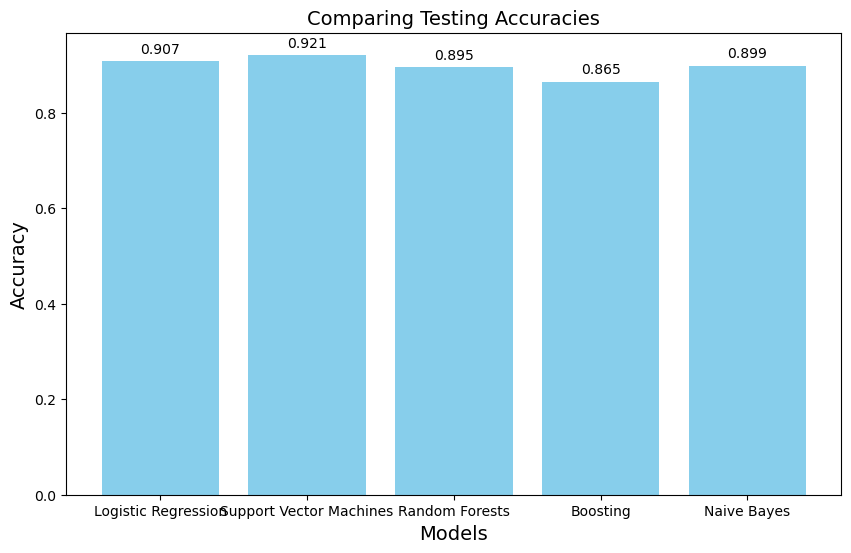

In [29]:
import matplotlib.pyplot as plt

#Getting the model names and accuracies from test_accuracies dictionary
model_names = list(test_accuracies.keys())
testing_accuracies = list(test_accuracies.values())

#Creation of the plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, testing_accuracies, color='skyblue')

#For adding accuracy values to 3 decimals at the top of the bar
for i, v in enumerate(testing_accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center', va='bottom')

# Adding the names to axes and customizing the fontsize
plt.xlabel('Models',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Comparing Testing Accuracies',fontsize=14)
